In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv('Chicago_Crime_Detective.csv', index_col=0)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 9 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), int64(3), object(4)
memory usage: 12.1+ MB


In [5]:
df.describe()

,ID,Beat,Year
count,1.916410e+05,191641.000000,191641.000000
mean,4.968629e+06,1258.810771,2006.134940
std,2.342997e+06,702.530465,3.520285
min,1.310022e+06,111.000000,2001.000000
25%,2.832144e+06,722.000000,2003.000000
50%,4.762956e+06,1121.000000,2006.000000
75%,7.201878e+06,1733.000000,2009.000000
max,9.181151e+06,2535.000000,2012.000000


In [6]:
df.isna().any()

ID                     False
Date                   False
LocationDescription    False
Arrest                 False
Domestic               False
Beat                   False
District                True
CommunityArea           True
Year                   False
dtype: bool

    District and CommunityArea has missing values

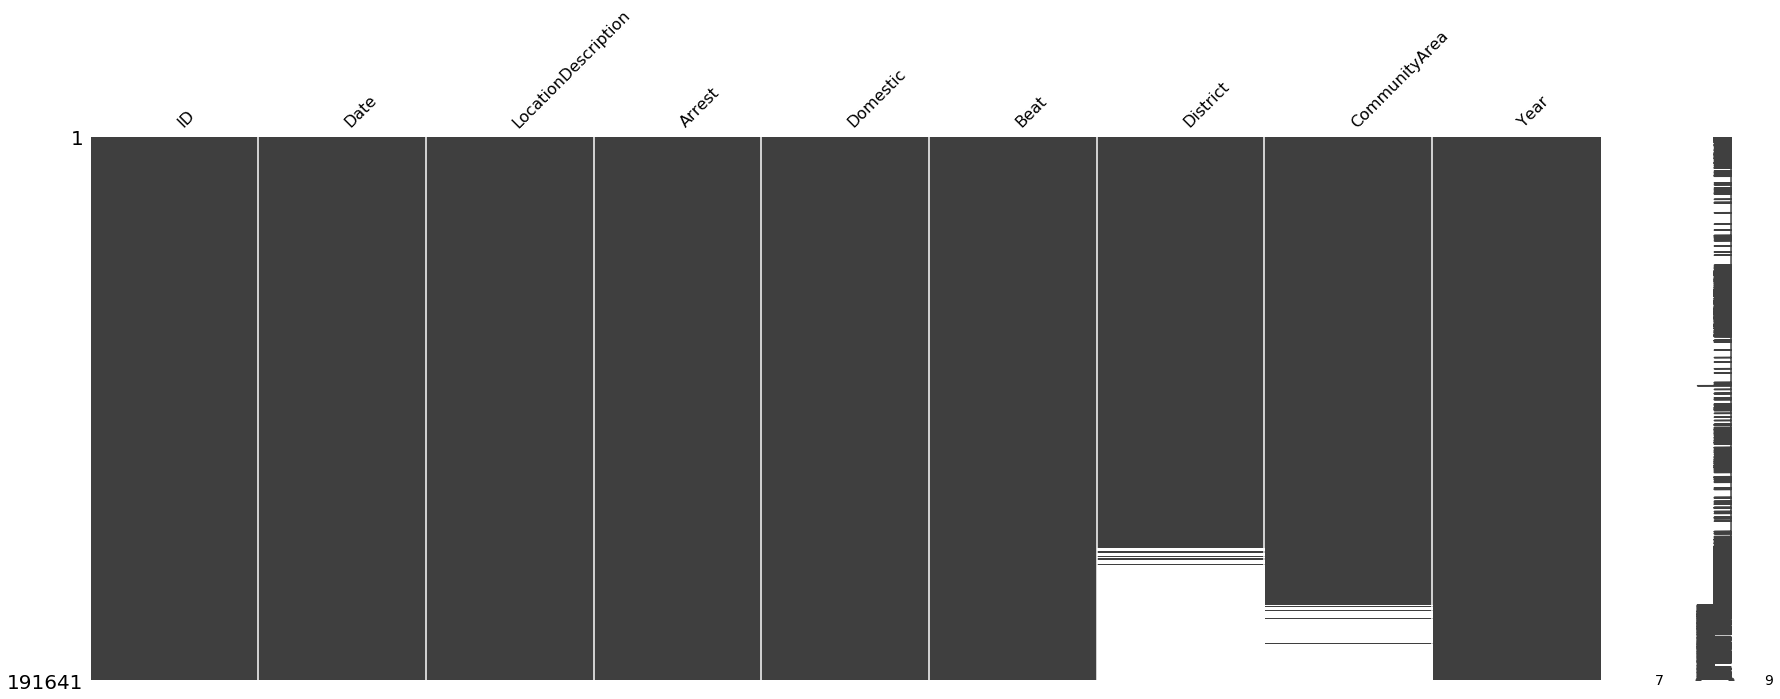

In [7]:
import missingno
missingno.matrix(df, figsize = (30,10))

In [8]:
cleaned_df = df.copy()

In [9]:
cleaned_df['CommunityArea'] = cleaned_df['CommunityArea'].convert_objects(convert_numeric=True)
cleaned_df['District'] = cleaned_df['District'].convert_objects(convert_numeric=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 9 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148585 non-null float64
CommunityArea          167025 non-null float64
Year                   191641 non-null int64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 12.1+ MB


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [10]:
cleaned_df.replace({"?":np.nan,"":np.nan},inplace=True)

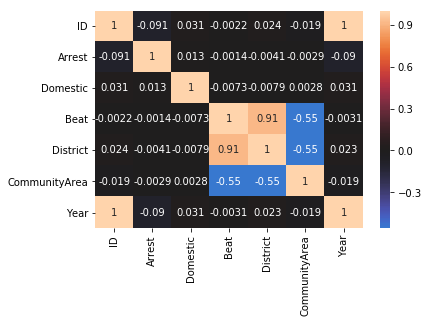

In [11]:
sns.heatmap(cleaned_df.corr(),center=0,annot=True)

In [12]:
cleaned_df['ID'].is_unique

True

In [13]:
cleaned_df['LocationDescription'].value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

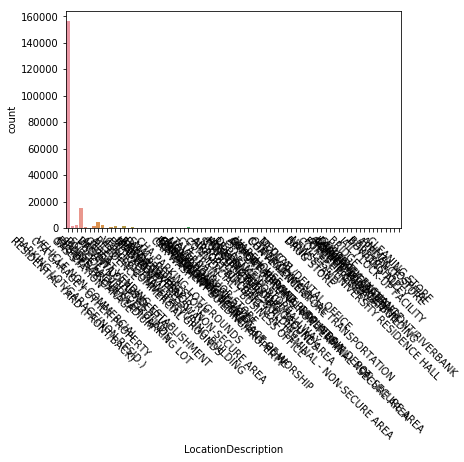

In [14]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='LocationDescription', data=cleaned_df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Inferences
    1. As Beat,District and CommunityArea are highly correlated columns and there are NaN values in District and CommunityArea column, we will drop these columns
    2. Id is unique for each record and thus we will drop this column too
    3. Year can be changed to Date Type
    4. Map Boolean Columns to 0/1: False - 0, True - 1
    5. As the graph of 'LocationDescription' is highly biased to value-'STREETS', we will drop 'LocationDescription' column too

In [15]:
#Dropping Columns
drop_columns = ['ID','District','CommunityArea']
cleaned_df.drop(columns = drop_columns,axis = 1,inplace = True)

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 6 columns):
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
Year                   191641 non-null int64
dtypes: bool(2), int64(2), object(2)
memory usage: 12.7+ MB


In [16]:
#Changing the Year Column's Format
cleaned_df['Year'] = pd.to_datetime(cleaned_df['Year'])
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 6 columns):
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
Year                   191641 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(1), object(1)
memory usage: 12.7+ MB


In [17]:
cleaned_df.head()

,Date,LocationDescription,Arrest,Domestic,Beat,Year
0,2012-12-31 23:15:00,STREET,False,False,623,1970-01-01 00:00:00.000002012
1,2012-12-31 22:00:00,STREET,False,False,1213,1970-01-01 00:00:00.000002012
2,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,1970-01-01 00:00:00.000002012
3,2012-12-31 22:00:00,STREET,False,False,724,1970-01-01 00:00:00.000002012
4,2012-12-31 21:30:00,STREET,False,False,211,1970-01-01 00:00:00.000002012


In [18]:
print(cleaned_df['Domestic'].value_counts())
print(cleaned_df['Arrest'].value_counts())

False    191226
True        415
Name: Domestic, dtype: int64
False    176105
True      15536
Name: Arrest, dtype: int64


In [19]:
'''
cleaned_df['Arrest'] = cleaned_df['Arrest'].astype(int)
cleaned_df['Domestic'] = cleaned_df['Domestic'].astype(int)
print(cleaned_df['Arrest'].value_counts())
print(cleaned_df['Domestic'].value_counts())
cleaned_df.info()
'''

"\ncleaned_df['Arrest'] = cleaned_df['Arrest'].astype(int)\ncleaned_df['Domestic'] = cleaned_df['Domestic'].astype(int)\nprint(cleaned_df['Arrest'].value_counts())\nprint(cleaned_df['Domestic'].value_counts())\ncleaned_df.info()\n"

In [20]:
cleaned_df.head()

,Date,LocationDescription,Arrest,Domestic,Beat,Year
0,2012-12-31 23:15:00,STREET,False,False,623,1970-01-01 00:00:00.000002012
1,2012-12-31 22:00:00,STREET,False,False,1213,1970-01-01 00:00:00.000002012
2,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,1970-01-01 00:00:00.000002012
3,2012-12-31 22:00:00,STREET,False,False,724,1970-01-01 00:00:00.000002012
4,2012-12-31 21:30:00,STREET,False,False,211,1970-01-01 00:00:00.000002012


In [21]:
cleaned_df.describe()

,Beat
count,191641.000000
mean,1258.810771
std,702.530465
min,111.000000
25%,722.000000
50%,1121.000000
75%,1733.000000
max,2535.000000


### What is the Month and Year of the median date in our dataset? *

In [22]:
import calendar
date_series = cleaned_df['Date']
median_date = date_series.quantile(.5)
print(calendar.month_name[median_date.month],median_date.year)

May 2006


### In which month did the lowest motor vehicle thefts occur? *

In [23]:
groupby_month = cleaned_df.groupby(cleaned_df['Date'].dt.month)['Date'].count()
min_value_month = groupby_month.min()
min_month = pd.Index(groupby_month).get_loc(min_value_month) + 1
print(min_value_month,min_month,calendar.month_name[min_month])
print(groupby_month)

13511 2 February
Date
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: Date, dtype: int64


### On which weekday did most motor vehicle thefts occur? *

In [24]:
groupby_weekday = cleaned_df.groupby(cleaned_df['Date'].dt.weekday)['Date'].count()
max_value_weekday = groupby_weekday.max()
max_weekday = pd.Index(groupby_weekday).get_loc(max_value_weekday)
print(max_value_weekday,max_weekday,calendar.day_name[max_weekday])
print(groupby_weekday)

29284 4 Friday
Date
0    27397
1    26791
2    27416
3    27319
4    29284
5    27118
6    26316
Name: Date, dtype: int64


### Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? *

In [25]:
groupby_arrest = cleaned_df[cleaned_df['Arrest'] == True].groupby(cleaned_df['Date'].dt.month)["Arrest"].count()
max_value_arrest = groupby_arrest.max()
month_max_arrest = pd.Index(groupby_arrest).get_loc(max_value_arrest) + 1
print(max_value_arrest,month_max_arrest,calendar.month_name[month_max_arrest])
print(groupby_arrest)

1435 1 January
Date
1     1435
2     1238
3     1298
4     1252
5     1187
6     1230
7     1324
8     1329
9     1248
10    1342
11    1256
12    1397
Name: Arrest, dtype: int64


### Select the true statements *
    # In general, does it look like crime decreases from 2002 - 2012?
    # In general, does it look like crime increases from 2005 - 2008?
    # In general, does it look like crime increases from 2009 - 2011?

       Year
Date       
2001  20669
2002  18753
2003  16657
2004  16862
2005  16484
2006  16098
2007  14280
2008  14445
2009  12167
2010  15497
2011  15637
2012  14092


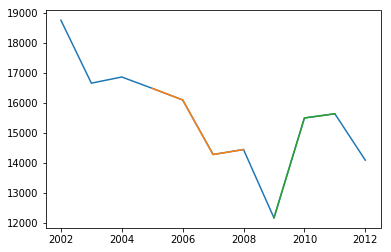

In [26]:
groupby_year = cleaned_df.groupby(cleaned_df['Date'].dt.year).agg({"Year": "count"})
print(groupby_year)
plt.plot(groupby_year.loc[2002:2012,:]) #Blue
plt.plot(groupby_year.loc[2005:2008,:]) #Orange
plt.plot(groupby_year.loc[2009:2011,:]) #Green
plt.show()

    # In general, does it look like crime decreases from 2002 - 2012?
    # Yes
    # In general, does it look like crime increases from 2005 - 2008?
    # No
    # In general, does it look like crime increases from 2009 - 2011?
    # Yes

### Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *

In [27]:
arrested_grpby_year = cleaned_df[cleaned_df["Arrest"] == True].groupby(cleaned_df["Date"].dt.year).agg({"Arrest":"count"})
print(arrested_grpby_year)
first_half = arrested_grpby_year.loc[2001:2006,:].sum()
second_half = arrested_grpby_year.loc[2007:2012,:].sum()
print("ARRESTED\n",first_half,'\n',second_half)
print(first_half>second_half)

      Arrest
Date        
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
ARRESTED
 Arrest    10588
dtype: int64 
 Arrest    4948
dtype: int64
Arrest    True
dtype: bool


### For what proportion of motor vehicle thefts in 2001 was an arrest made? 

In [28]:
print(groupby_year.loc[2001]) #Total Crimes
print(arrested_grpby_year.loc[2001]) #Arrested
prop_2001 = int(arrested_grpby_year.loc[2001]) / int(groupby_year.loc[2001])
print("ANS:" , round(prop_2001,2))

Year    20669
Name: 2001, dtype: int64
Arrest    2152
Name: 2001, dtype: int64
ANS: 0.1


### For what proportion of motor vehicle thefts in 2007 was an arrest made? 

In [29]:
print(groupby_year.loc[2007]) #Total Crimes
print(arrested_grpby_year.loc[2007]) #Arrested
prop_2007 = int(arrested_grpby_year.loc[2007]) / int(groupby_year.loc[2007])
print("ANS:" , round(prop_2007,2))

Year    14280
Name: 2007, dtype: int64
Arrest    1212
Name: 2007, dtype: int64
ANS: 0.08


### Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? *

In [30]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [31]:
topLocations = cleaned_df["LocationDescription"].value_counts().sort_values(ascending=False)[0:6]
topLocations.drop(labels=['OTHER'],inplace=True)
topLocationNames = [x for x in topLocations.index]
print(topLocationNames)

['STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL']


### Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5? *

In [32]:
Top5 = cleaned_df.loc[cleaned_df["LocationDescription"].isin(topLocationNames),:]
Top5.head()

,Date,LocationDescription,Arrest,Domestic,Beat,Year
0,2012-12-31 23:15:00,STREET,False,False,623,1970-01-01 00:00:00.000002012
1,2012-12-31 22:00:00,STREET,False,False,1213,1970-01-01 00:00:00.000002012
3,2012-12-31 22:00:00,STREET,False,False,724,1970-01-01 00:00:00.000002012
4,2012-12-31 21:30:00,STREET,False,False,211,1970-01-01 00:00:00.000002012
5,2012-12-31 20:30:00,STREET,True,False,2521,1970-01-01 00:00:00.000002012


In [33]:
Top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177510 entries, 0 to 191640
Data columns (total 6 columns):
Date                   177510 non-null datetime64[ns]
LocationDescription    177510 non-null object
Arrest                 177510 non-null bool
Domestic               177510 non-null bool
Beat                   177510 non-null int64
Year                   177510 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(1), object(1)
memory usage: 7.1+ MB


#### There are total of 177510 observations

### On which day of the week do the most motor vehicle thefts at gas stations happen? *

Date
0    280
1    270
2    273
3    282
4    332
5    338
6    336
Name: Date, dtype: int64
338 5
Saturday


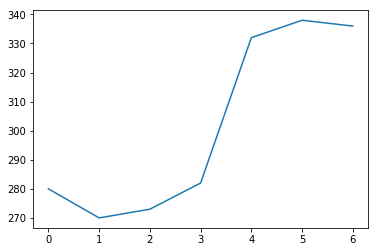

In [34]:
thefts_at_gs = cleaned_df.loc[cleaned_df['LocationDescription'] == 'GAS STATION',:].groupby(cleaned_df['Date'].dt.weekday)["Date"].count()
max_thefts_at_gs = thefts_at_gs.max()
day_max_thefts_at_gs = pd.Index(thefts_at_gs).get_loc(max_thefts_at_gs)
print(thefts_at_gs)
print(max_thefts_at_gs,day_max_thefts_at_gs)
print(calendar.day_name[day_max_thefts_at_gs])
plt.plot(thefts_at_gs)

#### Saturday